Anna D'Angela | Return to [GitHub](https://github.com/anna-dang/music) | [Blog](https://annadangela.medium.com/playlist-analysis-using-genius-api-d7dedaaf4b9?sk=e39b6f903590d799852a8f2f7cdf4a8f)

# Playlist Analysis
*Toy project to play with Spotify and Genius APIs analyzing my own playlist*




-----

## Contents
    i. Connect spotify API, gather playlist data
    ii. Organize song data, build df
    iii. Plot song features as radar plot
    iv. Connect to genius API, get song lyrics, add to df
    v. Sentiment analysis of song lyrics using VADER, add score to df
    vi. Plot sentiment/build metric for overall playlist
    vii. Conclusion

In [1]:
import json
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lyricsgenius as lg
import plotly.express as px

import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.preprocessing import MinMaxScaler

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### i. Connect to Spotify API, retrieve playlist details

In [2]:
# Set API credentials
with open("/Users/annadangela/Documents/Shh/spotify_token.json") as f:
    d = json.load(f)
    client_id = d['id']
    client_secret = d['secret']

In [3]:
# Create a variable that handles requests, set client
handler = SpotifyClientCredentials(client_id, client_secret)
sc = sp.Spotify(client_credentials_manager = handler)

In [4]:
# Select playlist to analyze
playlist_id = input('Past Spotify Playist URI:')
print('Selected URI:', playlist_id)

# test on : spotify:playlist:7MEqMmwJ35o0Ugg5Bm7Gup

Selected URI: spotify:playlist:7MEqMmwJ35o0Ugg5Bm7Gup


In [5]:
# Get playlist info through API client
results = sc.playlist(playlist_id)

In [ ]:
# Preview JSON results
results

In [34]:
# Get song IDs from results
title = results['description']
songs = [i['track']['id'] for i in results['tracks']['items']]
print(f"'{title}', {len(songs)} songs")
songs[:5]

'I have all night', 48 songs


['1QXiYUBKaibKVHEbxBeu1f',
 '0f3HpUeCzPHnOYKu0mPhjJ',
 '4e1TDCaLkn77JOgghYb11y',
 '0mpvvju4F87swOqaC3pjAU',
 '5gCGQlfEofp2Zxz5ZjJAa9']

### ii. Build playlist DF, organize song data

In [46]:
# TODO tidy up, not mine

song_meta = {'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in songs:
    # get song's meta data
    meta = sc.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album = meta['album']['name']
    song_meta['album'] += [album]

    # song name
    song = meta['name']
    song_meta['name'] += [song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist'] += [artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit = meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity = meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df = pd.DataFrame.from_dict(song_meta)
song_meta_df.head()

,id,album,name,artist,explicit,popularity
0,1QXiYUBKaibKVHEbxBeu1f,Veil of Counsel,Ecco,Public Memory,False,48
1,0f3HpUeCzPHnOYKu0mPhjJ,Evigt Fiskande,Evigt Fiskande - Original Mix,PANG!,False,36
2,4e1TDCaLkn77JOgghYb11y,Solar,Swan Dive,Maceo Plex,False,34
3,0mpvvju4F87swOqaC3pjAU,Solar,Polygon Pulse,"Maceo Plex, DNCN",False,33
4,5gCGQlfEofp2Zxz5ZjJAa9,W:/2016ALBUM/,Let Go,"deadmau5, Grabbitz",False,49
5,5f4Y1zAYIinYJV5TlZgKLt,Rise,Hot As You Want,"Lane 8, Solomon Grey",False,43
6,7IctzNEJucIBzkAWYg6np2,The Chain,The Chain,Kerala Dust,False,52
7,6G0mR7TmmHf5Tqi9CNZik3,Fliederregen / Reflection,Reflection,"Ben Böhmer, Wood, Margret",False,43
8,17Symm7sFoj7fEqMh8brzD,Quartz,Sugar on my Tongue,Fly Golden Eagle,False,0
9,6ZIT7Isugjflmm3TDIkgji,Ride in the city,So Hot - Original Mix,Funky Fat,False,27


In [187]:
# look up song features by track id
features = sc.audio_features(songs)
features[:3]

[{'danceability': 0.589,
  'energy': 0.38,
  'key': 9,
  'loudness': -9.833,
  'mode': 0,
  'speechiness': 0.0272,
  'acousticness': 0.0802,
  'instrumentalness': 0.9,
  'liveness': 0.344,
  'valence': 0.18,
  'tempo': 89.982,
  'type': 'audio_features',
  'id': '1QXiYUBKaibKVHEbxBeu1f',
  'uri': 'spotify:track:1QXiYUBKaibKVHEbxBeu1f',
  'track_href': 'https://api.spotify.com/v1/tracks/1QXiYUBKaibKVHEbxBeu1f',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1QXiYUBKaibKVHEbxBeu1f',
  'duration_ms': 318434,
  'time_signature': 4},
 {'danceability': 0.729,
  'energy': 0.705,
  'key': 7,
  'loudness': -10.458,
  'mode': 0,
  'speechiness': 0.0294,
  'acousticness': 0.111,
  'instrumentalness': 0.703,
  'liveness': 0.0778,
  'valence': 0.101,
  'tempo': 121.986,
  'type': 'audio_features',
  'id': '0f3HpUeCzPHnOYKu0mPhjJ',
  'uri': 'spotify:track:0f3HpUeCzPHnOYKu0mPhjJ',
  'track_href': 'https://api.spotify.com/v1/tracks/0f3HpUeCzPHnOYKu0mPhjJ',
  'analysis_url': 'https://api.

In [188]:
features_df = pd.DataFrame.from_dict(features)
features_df['duration_min']=features_df['duration_ms']/60000
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,duration_min
0,0.589,0.380,9,-9.833,0,0.0272,0.08020,0.900,0.3440,0.1800,89.982,audio_features,1QXiYUBKaibKVHEbxBeu1f,spotify:track:1QXiYUBKaibKVHEbxBeu1f,https://api.spotify.com/v1/tracks/1QXiYUBKaibK...,https://api.spotify.com/v1/audio-analysis/1QXi...,318434,4,5.307233
1,0.729,0.705,7,-10.458,0,0.0294,0.11100,0.703,0.0778,0.1010,121.986,audio_features,0f3HpUeCzPHnOYKu0mPhjJ,spotify:track:0f3HpUeCzPHnOYKu0mPhjJ,https://api.spotify.com/v1/tracks/0f3HpUeCzPHn...,https://api.spotify.com/v1/audio-analysis/0f3H...,480015,3,8.000250
2,0.716,0.554,6,-11.365,1,0.0345,0.00963,0.789,0.0450,0.1120,110.010,audio_features,4e1TDCaLkn77JOgghYb11y,spotify:track:4e1TDCaLkn77JOgghYb11y,https://api.spotify.com/v1/tracks/4e1TDCaLkn77...,https://api.spotify.com/v1/audio-analysis/4e1T...,555059,4,9.250983
3,0.706,0.638,4,-8.370,0,0.0312,0.23900,0.695,0.0951,0.4960,126.987,audio_features,0mpvvju4F87swOqaC3pjAU,spotify:track:0mpvvju4F87swOqaC3pjAU,https://api.spotify.com/v1/tracks/0mpvvju4F87s...,https://api.spotify.com/v1/audio-analysis/0mpv...,400791,4,6.679850
4,0.644,0.555,0,-10.981,0,0.0429,0.20500,0.309,0.1200,0.0345,128.026,audio_features,5gCGQlfEofp2Zxz5ZjJAa9,spotify:track:5gCGQlfEofp2Zxz5ZjJAa9,https://api.spotify.com/v1/tracks/5gCGQlfEofp2...,https://api.spotify.com/v1/audio-analysis/5gCG...,378450,3,6.307500


In [179]:
# build out df
final_df = song_meta_df.merge(features_df, on = 'id')
final_df.head(10)

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,duration_min
0,1QXiYUBKaibKVHEbxBeu1f,Veil of Counsel,Ecco,Public Memory,False,48,0.589,0.380,9,-9.833,...,0.3440,0.1800,89.982,audio_features,spotify:track:1QXiYUBKaibKVHEbxBeu1f,https://api.spotify.com/v1/tracks/1QXiYUBKaibK...,https://api.spotify.com/v1/audio-analysis/1QXi...,318434,4,5.307233
1,0f3HpUeCzPHnOYKu0mPhjJ,Evigt Fiskande,Evigt Fiskande - Original Mix,PANG!,False,36,0.729,0.705,7,-10.458,...,0.0778,0.1010,121.986,audio_features,spotify:track:0f3HpUeCzPHnOYKu0mPhjJ,https://api.spotify.com/v1/tracks/0f3HpUeCzPHn...,https://api.spotify.com/v1/audio-analysis/0f3H...,480015,3,8.000250
2,4e1TDCaLkn77JOgghYb11y,Solar,Swan Dive,Maceo Plex,False,34,0.716,0.554,6,-11.365,...,0.0450,0.1120,110.010,audio_features,spotify:track:4e1TDCaLkn77JOgghYb11y,https://api.spotify.com/v1/tracks/4e1TDCaLkn77...,https://api.spotify.com/v1/audio-analysis/4e1T...,555059,4,9.250983
3,0mpvvju4F87swOqaC3pjAU,Solar,Polygon Pulse,"Maceo Plex, DNCN",False,33,0.706,0.638,4,-8.370,...,0.0951,0.4960,126.987,audio_features,spotify:track:0mpvvju4F87swOqaC3pjAU,https://api.spotify.com/v1/tracks/0mpvvju4F87s...,https://api.spotify.com/v1/audio-analysis/0mpv...,400791,4,6.679850
4,5gCGQlfEofp2Zxz5ZjJAa9,W:/2016ALBUM/,Let Go,"deadmau5, Grabbitz",False,49,0.644,0.555,0,-10.981,...,0.1200,0.0345,128.026,audio_features,spotify:track:5gCGQlfEofp2Zxz5ZjJAa9,https://api.spotify.com/v1/tracks/5gCGQlfEofp2...,https://api.spotify.com/v1/audio-analysis/5gCG...,378450,3,6.307500
5,5f4Y1zAYIinYJV5TlZgKLt,Rise,Hot As You Want,"Lane 8, Solomon Grey",False,43,0.625,0.599,8,-7.997,...,0.2950,0.2340,125.019,audio_features,spotify:track:5f4Y1zAYIinYJV5TlZgKLt,https://api.spotify.com/v1/tracks/5f4Y1zAYIinY...,https://api.spotify.com/v1/audio-analysis/5f4Y...,286690,4,4.778167
6,7IctzNEJucIBzkAWYg6np2,The Chain,The Chain,Kerala Dust,False,52,0.682,0.492,9,-13.151,...,0.1070,0.3980,151.016,audio_features,spotify:track:7IctzNEJucIBzkAWYg6np2,https://api.spotify.com/v1/tracks/7IctzNEJucIB...,https://api.spotify.com/v1/audio-analysis/7Ict...,321763,4,5.362717
7,6G0mR7TmmHf5Tqi9CNZik3,Fliederregen / Reflection,Reflection,"Ben Böhmer, Wood, Margret",False,43,0.756,0.517,1,-8.923,...,0.1200,0.3330,123.005,audio_features,spotify:track:6G0mR7TmmHf5Tqi9CNZik3,https://api.spotify.com/v1/tracks/6G0mR7TmmHf5...,https://api.spotify.com/v1/audio-analysis/6G0m...,300860,4,5.014333
8,17Symm7sFoj7fEqMh8brzD,Quartz,Sugar on my Tongue,Fly Golden Eagle,False,0,0.431,0.574,6,-8.968,...,0.5620,0.5110,97.557,audio_features,spotify:track:17Symm7sFoj7fEqMh8brzD,https://api.spotify.com/v1/tracks/17Symm7sFoj7...,https://api.spotify.com/v1/audio-analysis/17Sy...,340600,4,5.676667
9,6ZIT7Isugjflmm3TDIkgji,Ride in the city,So Hot - Original Mix,Funky Fat,False,27,0.920,0.406,0,-11.738,...,0.0685,0.5590,120.088,audio_features,spotify:track:6ZIT7Isugjflmm3TDIkgji,https://api.spotify.com/v1/tracks/6ZIT7Isugjfl...,https://api.spotify.com/v1/audio-analysis/6ZIT...,404548,4,6.742467


### iii. Plot Radar graph

In [67]:
radar_feats = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
radar_df = final_df[radar_feats]
radar_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.589,0.380,9,-9.833,0,0.0272,0.08020,0.900,0.3440,0.1800,89.982
1,0.729,0.705,7,-10.458,0,0.0294,0.11100,0.703,0.0778,0.1010,121.986
2,0.716,0.554,6,-11.365,1,0.0345,0.00963,0.789,0.0450,0.1120,110.010
3,0.706,0.638,4,-8.370,0,0.0312,0.23900,0.695,0.0951,0.4960,126.987
4,0.644,0.555,0,-10.981,0,0.0429,0.20500,0.309,0.1200,0.0345,128.026


In [68]:
# Set all to same scale
min_max_scaler = MinMaxScaler()
radar_df.loc[:] = min_max_scaler.fit_transform(radar_df.loc[:])
radar_df.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.421329,0.102655,0.818182,0.447011,0.0,0.022388,0.107425,0.965665,0.532028,0.181083,0.132511
1,0.666084,0.677876,0.636364,0.389714,0.0,0.042910,0.148903,0.754292,0.058363,0.082763,0.415557
2,0.643357,0.410619,0.545455,0.306564,1.0,0.090485,0.012391,0.846567,0.000000,0.096453,0.309640
3,0.625874,0.559292,0.363636,0.581133,0.0,0.059701,0.321277,0.745708,0.089146,0.574362,0.459786
4,0.517483,0.412389,0.000000,0.341768,0.0,0.168843,0.275490,0.331545,0.133452,0.000000,0.468975


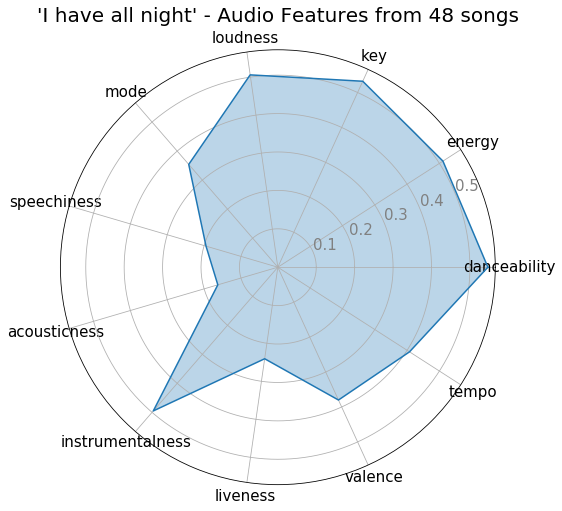

In [77]:
# TODO not mine

# number of categories
N = len(radar_feats)
value = list(radar_df.mean())

# repeat first value to close the circle
value += value[:1]

# calculate angle for each category
angles = [ n/float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# plot radar
fig=plt.figure(figsize=(12,8))
plt.polar(angles, value)
plt.fill(angles, value, alpha=0.3)

plt.title(f"'{title}' - Audio Features from {len(songs)} songs", size=20)
plt.xticks(angles[:-1], radar_feats, size=15)
plt.yticks(color='grey',size=15)
plt.show()

### iv. Connect to Genius API, collect song lyrics, add to DF



In [81]:
# impliment credentials for accessing API
with open("/Users/annadangela/Documents/Shh/genius_api.json") as f:
    d = json.load(f)
    token = d['token']
    
gpA = lg.Genius(token)

In [190]:
def get_lyrics(song_name, artist_name):
    """Access Genius API via LyricsGenius client to pull lyric data of a song.
        input: song name and artist name as str
        output: lyrics as str, if no lyrics found, return placeholder statement."""
    try:
        lyrics = gpA.search_song(song_name, artist_name).lyrics
    except:
        lyrics = 'Not Found'
    return lyrics

final_df['lyrics'] = final_df.apply(lambda row: get_lyrics(row['name'], row['artist']), axis=1)

Searching for "Ecco" by Public Memory...
Done.
Searching for "Evigt Fiskande - Original Mix" by PANG!...
No results found for: 'Evigt Fiskande - Original Mix PANG!'
Searching for "Swan Dive" by Maceo Plex...
Done.
Searching for "Polygon Pulse" by Maceo Plex, DNCN...
Done.
Searching for "Let Go" by deadmau5, Grabbitz...
Done.
Searching for "Hot As You Want" by Lane 8, Solomon Grey...
Done.
Searching for "The Chain" by Kerala Dust...
Done.
Searching for "Reflection" by Ben Böhmer, Wood, Margret...
Done.
Searching for "Sugar on my Tongue" by Fly Golden Eagle...
Done.
Searching for "So Hot - Original Mix" by Funky Fat...
Done.
Searching for "Paspatou" by Parra for Cuva...
Specified song does not contain lyrics. Rejecting.
Searching for "What You Need" by Flume...
Done.
Searching for "A New Error" by Moderat...
Done.
Searching for "M'aider" by Maxxi Soundsystem...
No results found for: 'M'aider Maxxi Soundsystem'
Searching for "Insane" by Flume, Moon Holiday...
Done.
Searching for "Road - D

In [191]:
print(f"Lyrics not found: {len(final_df[final_df['lyrics'] == 'Not Found'])} / {final_df.shape[0]}")

Lyrics not found: 11 / 48


In [192]:
final_df['lyrics']

0     When I finish with the lion's share\nI will go...
1                                             Not Found
2     Freaky tales, ICP, true stories, short version...
3     I've been holding on for as long as I can\nI d...
4     [Verse 1]\nI know you'll look the other way\nI...
5     My love can see in the dark\nYou're blind to o...
6     Listen to the wind blow\nWatch the sun rise\nR...
7     And I wonder why you [?]\nAnd all that I [?] l...
8     Click on the letters to jump to the terms unde...
9     [Intro]\nWell, my name is Schaffer and I'm her...
10                                            Not Found
11    [Chorus]\nWaiting to love you\nI've got what y...
12    Dubity dubity\nDubity dubity\nDubity dubity\nD...
13                                            Not Found
14    [Verse 1: Moon Holiday]\nYou don't have to be ...
15                                            Not Found
16    [Verse 1]\nI stared out stained glass windows\...
17    Chapter 1 1992\n\n‘So, have you told your 

### v. VADER sentiment analysis of lyrics, add scores to DF

In [146]:
# Apply VADER to lyrics
analyzer = SentimentIntensityAnalyzer()

final_df['polarity'] = final_df['lyrics'].apply(lambda row: analyzer.polarity_scores(row), axis=1)

In [176]:
final_df['polarity'].head(10)

0    {'neg': 0.057, 'neu': 0.819, 'pos': 0.124, 'co...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.165, 'neu': 0.715, 'pos': 0.12, 'com...
3    {'neg': 0.032, 'neu': 0.927, 'pos': 0.04, 'com...
4    {'neg': 0.028, 'neu': 0.946, 'pos': 0.026, 'co...
5    {'neg': 0.048, 'neu': 0.871, 'pos': 0.082, 'co...
6    {'neg': 0.272, 'neu': 0.66, 'pos': 0.068, 'com...
7    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8    {'neg': 0.285, 'neu': 0.554, 'pos': 0.161, 'co...
9    {'neg': 0.096, 'neu': 0.807, 'pos': 0.098, 'co...
Name: polarity, dtype: object

In [178]:
# Explode vadar results from dict into columns, replace original column
sent_df = pd.concat([final_df.drop(['polarity'], axis=1), final_df['polarity'].apply(pd.Series)], axis=1)
sent_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,track_href,analysis_url,duration_ms,time_signature,duration_min,lyrics,neg,neu,pos,compound
0,1QXiYUBKaibKVHEbxBeu1f,Veil of Counsel,Ecco,Public Memory,False,48,0.589,0.380,9,-9.833,...,https://api.spotify.com/v1/tracks/1QXiYUBKaibK...,https://api.spotify.com/v1/audio-analysis/1QXi...,318434,4,5.307233,When I finish with the lion's share\nI will go...,0.057,0.819,0.124,0.8548
1,0f3HpUeCzPHnOYKu0mPhjJ,Evigt Fiskande,Evigt Fiskande - Original Mix,PANG!,False,36,0.729,0.705,7,-10.458,...,https://api.spotify.com/v1/tracks/0f3HpUeCzPHn...,https://api.spotify.com/v1/audio-analysis/0f3H...,480015,3,8.000250,Not Found,0.000,1.000,0.000,0.0000
2,4e1TDCaLkn77JOgghYb11y,Solar,Swan Dive,Maceo Plex,False,34,0.716,0.554,6,-11.365,...,https://api.spotify.com/v1/tracks/4e1TDCaLkn77...,https://api.spotify.com/v1/audio-analysis/4e1T...,555059,4,9.250983,"Freaky tales, ICP, true stories, short version...",0.165,0.715,0.120,-1.0000
3,0mpvvju4F87swOqaC3pjAU,Solar,Polygon Pulse,"Maceo Plex, DNCN",False,33,0.706,0.638,4,-8.370,...,https://api.spotify.com/v1/tracks/0mpvvju4F87s...,https://api.spotify.com/v1/audio-analysis/0mpv...,400791,4,6.679850,I've been holding on for as long as I can\nI d...,0.032,0.927,0.040,-0.0772
4,5gCGQlfEofp2Zxz5ZjJAa9,W:/2016ALBUM/,Let Go,"deadmau5, Grabbitz",False,49,0.644,0.555,0,-10.981,...,https://api.spotify.com/v1/tracks/5gCGQlfEofp2...,https://api.spotify.com/v1/audio-analysis/5gCG...,378450,3,6.307500,[Verse 1]\nI know you'll look the other way\nI...,0.028,0.946,0.026,-0.5151


### vi. Plot sentiment/build metric for overall playlist

In [170]:
# Only use songs where lyric data available (receives a pure 'neutral' score of 1)
lyrics_df = sent_df.loc[sent_df['neu'] != 1]


# Set colors
colors = px.colors.qualitative.T10

# Plot Vader scores
fig = px.bar(lyrics_df, 
             x = lyrics_df['name'],
             y = [y for y in lyrics_df[['neg', 'neu', 'pos']]],
             template = 'ggplot2',
             #color_discrete_sequence = colors,
             color_discrete_map={"neg": "turquoise", "pos": "#FF9900", "neu": "silver"},
             title = f'{title} - Vader Sentiment Scores'
             )

fig.show()

In [173]:
lyrics_df['neg'].mean(), lyrics_df['neg'].sum()

(0.0981935483870968, 3.044000000000001)

In [174]:
lyrics_df['pos'].mean(), lyrics_df['pos'].sum()

(0.11132258064516129, 3.451)

The 'compound' score is a 'normalized, weighted composite score … normalized to be between -1 (most extreme negative) and +1 (most extreme positive)' - from the VADER documentation. Taking the average of this will balance out pos and neg, skewing toward neutral (0). 

In [186]:
lyrics_df['compound'].mean()

0.22712580645161287

In [175]:
# Overall playlist score
if lyrics_df['pos'].sum() > lyrics_df['neg'].sum():
    print("Mostly positive!")
else:
    print("Mostly negative")

Mostly positive!


### vii. Conclusion

To rank the overall sentiment of the playlist, I chose to examine both an average of the compound scores : 0.227; and the sum of positive/negative scores : 3.451 vs 3.044, respectively. This playlist is pretty balanced but skews slightly positive. For a real analysis, other rule based metrics should be explored to standardize ranking, but for a toy project I am satisfied with this visual. Checkout my blog [here](https://annadangela.medium.com/playlist-analysis-using-genius-api-d7dedaaf4b9?sk=e39b6f903590d799852a8f2f7cdf4a8f).